# MATH 210 Introduction to Mathematical Computing

## April 3, 2023

* Matrices
* `scipy.linalg`
* Matrix Multiplication
* Solving Linear Systems
* Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Matrices

In [2]:
A = np.array([[1.,2.],[-2.,1.]])
A

array([[ 1.,  2.],
       [-2.,  1.]])

In [3]:
type(A)

numpy.ndarray

In [4]:
A.shape

(2, 2)

In [5]:
np.ones((2,3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [6]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [7]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [8]:
np.diag(np.arange(1,6))

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [9]:
N = 5
B = np.ones((N,N)) - np.eye(N)
B

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [10]:
B @ B

array([[4., 3., 3., 3., 3.],
       [3., 4., 3., 3., 3.],
       [3., 3., 4., 3., 3.],
       [3., 3., 3., 4., 3.],
       [3., 3., 3., 3., 4.]])

In [11]:
B * B

array([[0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.]])

In [12]:
v = np.ones((N,1))
v

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [13]:
B@v

array([[4.],
       [4.],
       [4.],
       [4.],
       [4.]])

In [14]:
A@A

array([[-3.,  4.],
       [-4., -3.]])

## `scipy.linalg`

The main linear algebra package in Python is `scipy.linalg`. There is also `numpy.linalg` but we'll mainly use `scipy.linalg`.

In [15]:
import scipy.linalg as la

The function `la.solve` computes the solution of a linear system $A \mathbf{x}= \mathbf{b}$ where $A$ is a nonsingular matrix. (Recall *nonsingular* means that $A$ is invertible.)

In [16]:
A = np.array([[1.,-2.],[-2.,1.]])
A

array([[ 1., -2.],
       [-2.,  1.]])

In [17]:
la.det(A)

-3.0

In [18]:
b = np.array([2.,3.])
b

array([2., 3.])

In [19]:
x = la.solve(A,b)
x

array([-2.66666667, -2.33333333])

In [20]:
A@x

array([2., 3.])

## Interpolation

Consider $d+1$ data points $(x_0,y_0),\dots,(x_d,y_d)$ such that $x_i \ne x_j$ for $i \ne j$. There is a unique polynomial $p(x)$ of degree (at most) $d$ such that $p(x_i)=y_i$.

Let's find the unique $p(x) = a_0 + a_1x$ which interpolates $(0,2)$ and $(1,1)$.

In [21]:
x = [0,1]
y = [2,1]
X = [[1,x[0]],[1,x[1]]]
a = la.solve(X,y)
a

array([ 2., -1.])

Let's find the unique $p(x) = a_0 + a_1x + a_2x^2$ which interpolates $(-1,0)$, $(0,1)$ and $(1,0)$.

In [22]:
np.vander([-1,0,1],increasing=True)

array([[ 1, -1,  1],
       [ 1,  0,  0],
       [ 1,  1,  1]])

In [23]:
x = [-1,0,1]
y = [0,1,0]
# X = np.vander([-1,0,1],increasing=True)
X = [[1,x[0],x[0]**2],[1,x[1],x[1]**2],[1,x[2],x[2]**2]]
a = la.solve(X,y)
a

array([ 1.,  0., -1.])

$$
p(x) = C(x + 1)(x - 1)
$$

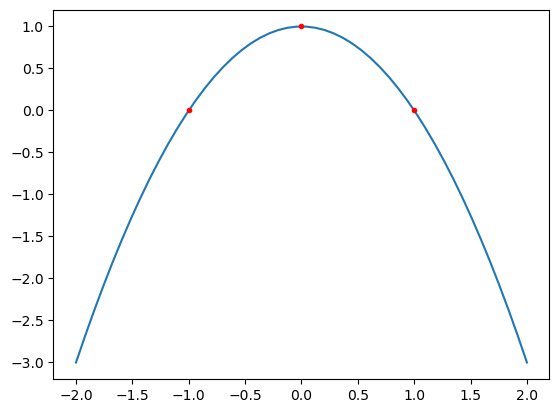

In [24]:
xvals = np.linspace(-2,2,50)
yvals = 1 - xvals**2
plt.plot(xvals,yvals,x,y,'r.')
plt.show()

In [25]:
N = 5
x = np.arange(0,N+1)
y = np.random.randint(-9,10,len(x))
X = np.vander(x,increasing=True)
a = la.solve(X,y)
a

array([ 3.   , -0.4  ,  3.75 , -6.375,  2.25 , -0.225])

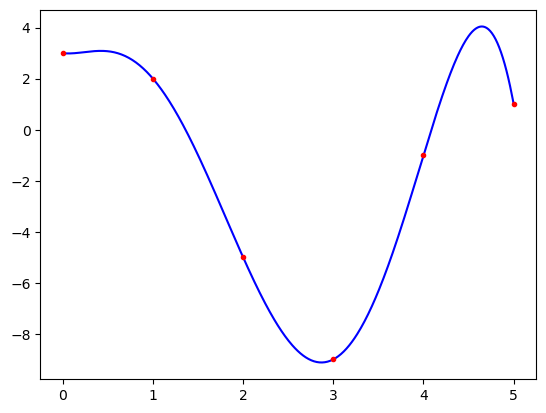

In [26]:
xvals = np.linspace(0,N,500)
yvals = sum([a[n]*xvals**n for n in range(len(a))])
plt.plot(xvals,yvals,'b',x,y,'r.')
plt.show()